Search: data/tea
Recommendations::
Item ID- 27   Item name- razzle dazzle frappuccino
Item ID- 8   Item name- mocha coffe frappuccino
Item ID- 26   Item name- caramel signature chocolate
Item ID- 43   Item name- avocado medley cake
Item ID- 55   Item name- new york cheesecake
Item ID- 9   Item name- mango passion fruit dark
Item ID- 2   Item name- asian dolce latte
Item ID- 59   Item name- pandan gula aren cake
Item ID- 12   Item name- signature chocolate
Item ID- 17   Item name- con panna


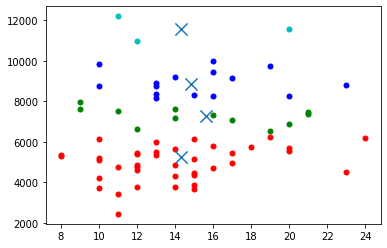

In [2]:
import os
import cv2
import pandas as pd
import numpy as np
from sklearn.cluster import MeanShift # as ms
from sklearn.datasets.samples_generator import make_blobs
import matplotlib.pyplot as plt
from collections import Counter

keyword = input("Search: ");
PATH = "data/"

for category in os.listdir(PATH):
    if category == keyword:
        path = os.path.join(PATH,category)
        for image in os.listdir(path):
            img = cv2.imread(os.path.join(path,image))
            img = cv2.resize(img,(200,200))
            cv2.imshow(category, img)
            cv2.waitKey(1000)


#cv2.destroyAllWindows()

centers = [[1,1],[5,5],[8,4]]

dataset = pd.read_csv('person.csv')

X = dataset.iloc[:,[2,3]].values
y = dataset.iloc[:,[0]].values
name = dataset['Item_names'].tolist()

#plt.scatter(X[:,0], X[:,1])
#plt.show()

ms = MeanShift()
ms.fit(X)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

#print(cluster_centers)

gg = Counter(labels)
#print(gg)

def find_max():
    max = gg[0]
    v = 0
    for i in range(len(gg)):
        if gg[i] > max:
            max = gg[i]
            v = i
    return v

#print(type(labels))
Y = y.tolist()
L = labels.tolist()

max_label = find_max()
#print("max_label",max_label)

suggest = []
for i in range(len(labels)):
    if max_label == L[i]:
        suggest.append(Y[i])

new = []

def stripp(rr):
    for i in range(len(suggest)):
        p=str(rr[i]).replace('[','').replace(']','')
        new.append(int(p))
    return new

new_Y = stripp(Y)
new_name = []
for i in range(len(suggest)):
    p=str(name[i]).replace('[','').replace(']','')
    new_name.append(p)


#print("new_y", new_Y[4])
#print("Y" ,p[0])
#print(Y, L)
#print(len(suggest))
#print("suggest array::",suggest)

n_clusters_ = len(np.unique(labels))

#print("Number of estimated clusters: ", n_clusters_)
suggest = 10
colors = 10*['r.','g.','b.','c.','k.','y.','m.']

#print(colors)
#print(labels)

for i in range(len(X)):
    plt.plot(X[i][0], X[i][1], colors[labels[i]],markersize = 10)

plt.scatter(cluster_centers[:,0],cluster_centers[:,1], marker = "x", s=150, linewidths = 5, zorder=10)


item_name = dict(zip(new_Y, new_name))
#print("item_name   ", item_name)


print("Recommendations::")
for i in range(suggest):
    print("Item ID- {}   Item name- {}".format(new_Y[i],new_name[i]))


plt.show()